In [12]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt 
import pandas as pd 

In [13]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt 
import pandas as pd 
from Incremental import Incremental
from ratelawgen import CandidateRateLaws, RateLaw
from simulate import Simulate
from preprocess import read_file

## Functions

In [14]:
# define rate laws as functions
def act_ratelaw1(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Ca*Cb*0.5

def act_ratelaw2(y,K):
    _, Cb, _, _, _, _ = y
    Ck = 0.5 
    return K[0]*Cb*Cb*Ck 

def act_ratelaw3(y,K):
    _, Cb, _, _, _, _ = y 
    return K[0]*Cb 

In [15]:
# candidate rate laws for first reaction
def cand_ratelaw11(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*np.ones((Ca.shape))

def cand_ratelaw12(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Cb

def cand_ratelaw13(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Ca

def cand_ratelaw14(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Ck*np.ones((Ca.shape))

def cand_ratelaw15(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Ca*Cb

def cand_ratelaw16(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Ca*Ck

def cand_ratelaw17(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Cb*Ck

def cand_ratelaw18(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Ca*Cb*Ck

def cand_ratelaw19(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Ca*Ca*Cb*Ck

def cand_ratelaw110(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Ca*Cb*Cb*Ck

###### reaction 2
# rate law candidates for reaction 2
def cand_ratelaw21(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*np.ones((Ca.shape))

def cand_ratelaw22(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Cb

def cand_ratelaw23(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*(Cb**3)*Ck

def cand_ratelaw24(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Cb*Ck

def cand_ratelaw25(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Cb*Cb*Ck

def cand_ratelaw26(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Ck*np.ones((Ca.shape))

### reaction 3
## rate law candidates for reaction 3
def cand_ratelaw31(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*np.ones((Ca.shape))

def cand_ratelaw32(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Cb

def cand_ratelaw33(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*(Cb**2)

def cand_ratelaw34(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Cb*Cb*Ck

def cand_ratelaw35(y,K):
    Ca, Cb, _, _, _, _ = y 
    Ck = 0.5
    return K[0]*Ck*np.ones((Ca.shape))

## Incremental

In [16]:
qin = 0.3
cin = np.array([0, 6, 0, 0, 0, 0])
N = [[-1, -1, 1, 0, 0, 0], [0, -2, 0, 1, 0 ,0], [0, -1, 0, 0, 1, 0]]
n0 = np.array([1, 1, 1, 1, 1, 1])
Mw = np.diag([67,84,151,168,84,84+151])/1000
ratelaws = [act_ratelaw1, act_ratelaw2, act_ratelaw3]
K = [[0.053], [0.128], [0.028],[0.000]]
Winhat = [0, 1, 0, 0, 0, 0]
uin = np.sum(qin * Mw@cin )
uout = 0.1512
V = 1
time = np.linspace(0,50,151)

In [17]:
candidates_list = [[cand_ratelaw11, cand_ratelaw12, cand_ratelaw13, cand_ratelaw14, cand_ratelaw15, cand_ratelaw16, cand_ratelaw17, cand_ratelaw18, cand_ratelaw19, cand_ratelaw110],
                  [cand_ratelaw21, cand_ratelaw22, cand_ratelaw23, cand_ratelaw24, cand_ratelaw25, cand_ratelaw26],
                  [cand_ratelaw31, cand_ratelaw32, cand_ratelaw33, cand_ratelaw34, cand_ratelaw35]]

In [18]:
sim = Simulate(N,Mw,V,Winhat,uin, uout, n0)
sim.add_ratelaws(ratelaws, K)

In [19]:
results_normal = sim.run_simulation(time, alpha=0)
c_normal = results_normal['moles']
f_normal = results_normal['flow_rate']
r_normal = results_normal['reaction_rate']
xr_normal = results_normal['xr']
xin_normal = results_normal['xin']
xout_normal = results_normal['xout']

results_noise = sim.run_simulation(time, alpha=1)
c_noise = results_noise['moles']
f_noise = results_noise['flow_rate']
r_noise = results_noise['reaction_rate']
xr_noise = results_noise['xr']
xin_noise = results_noise['xin']
xout_noise = results_noise['xout']

### Clean data

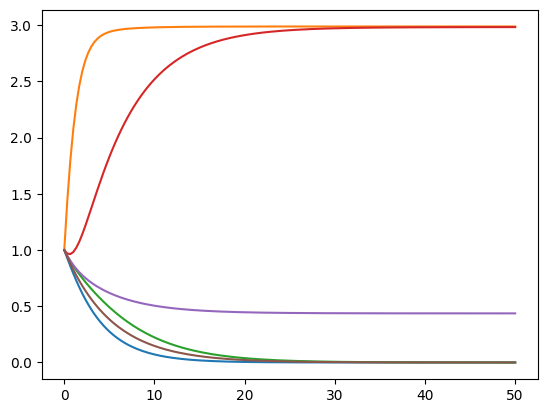

In [20]:
plt.plot(time, c_normal)
plt.show()

In [21]:
# creating model object
inc = Incremental(N, Mw, V, Winhat, uin, uout, n0)
# adding concentration data
inc.add_concentration_data(c_normal, time)

In [22]:
res = inc.estimate_parameters(candidates_list, method = 'rate_based', conf_int = False, metric = 'aicc', plot = True, bootstraps = 100)

Processing Reaction 1:
	Processing cand_ratelaw11 Law....
	Processing cand_ratelaw12 Law....
	Processing cand_ratelaw13 Law....
	Processing cand_ratelaw14 Law....
	Processing cand_ratelaw15 Law....
	Processing cand_ratelaw16 Law....
	Processing cand_ratelaw17 Law....
	Processing cand_ratelaw18 Law....
	Processing cand_ratelaw19 Law....
	Processing cand_ratelaw110 Law....
Processing Reaction 2:
	Processing cand_ratelaw21 Law....
	Processing cand_ratelaw22 Law....
	Processing cand_ratelaw23 Law....
	Processing cand_ratelaw24 Law....
	Processing cand_ratelaw25 Law....
	Processing cand_ratelaw26 Law....
Processing Reaction 3:
	Processing cand_ratelaw31 Law....
	Processing cand_ratelaw32 Law....
	Processing cand_ratelaw33 Law....
	Processing cand_ratelaw34 Law....
	Processing cand_ratelaw35 Law....


Reaction 1: 
Best Rate Law: cand_ratelaw18
Estimated Parameters: [0.05318281]

Reaction 2: 
Best Rate Law: cand_ratelaw25
Estimated Parameters: [0.12800014]

Reaction 3: 
Best Rate Law: cand_ratelaw32
Estimated Parameters: [0.02800499]



In [23]:
res['results'][0][7].x, res['results'][1][4].x, res['results'][2][1].x

(array([0.05318281]), array([0.12800014]), array([0.02800499]))

In [24]:
res = inc.estimate_parameters(candidates_list, method = 'extent_based', conf_int = False, metric = 'aicc', plot = True, bootstraps = 100)

Processing Reaction 1:
	Processing cand_ratelaw11 Law....
	Processing cand_ratelaw12 Law....
	Processing cand_ratelaw13 Law....
	Processing cand_ratelaw14 Law....
	Processing cand_ratelaw15 Law....
	Processing cand_ratelaw16 Law....
	Processing cand_ratelaw17 Law....
	Processing cand_ratelaw18 Law....
	Processing cand_ratelaw19 Law....
	Processing cand_ratelaw110 Law....
Processing Reaction 2:
	Processing cand_ratelaw21 Law....
	Processing cand_ratelaw22 Law....
	Processing cand_ratelaw23 Law....
	Processing cand_ratelaw24 Law....
	Processing cand_ratelaw25 Law....
	Processing cand_ratelaw26 Law....
Processing Reaction 3:
	Processing cand_ratelaw31 Law....
	Processing cand_ratelaw32 Law....
	Processing cand_ratelaw33 Law....
	Processing cand_ratelaw34 Law....
	Processing cand_ratelaw35 Law....


Reaction 1: 
Best Rate Law: cand_ratelaw13
Estimated Parameters: [0.06476373]

Reaction 2: 
Best Rate Law: cand_ratelaw25
Estimated Parameters: [0.12800553]

Reaction 3: 
Best Rate Law: cand_ratelaw35
Estimated Parameters: [0.16525798]



In [25]:
res['results'][0][7].x, res['results'][1][4].x, res['results'][2][1].x

(array([0.]), array([0.12800553]), array([0.]))

In [26]:
tuned_results = inc.finetune()

Best RateLaws: 
For reaction 1, best ratelaw is                         cand_ratelaw13
Parameters estimated: [0.0616489]
For reaction 2, best ratelaw is                         cand_ratelaw25
Parameters estimated: [0.1280487]
For reaction 3, best ratelaw is                         cand_ratelaw35
Parameters estimated: [0.16537271]


### Base Case
- 151 data points, 
- 1% noise

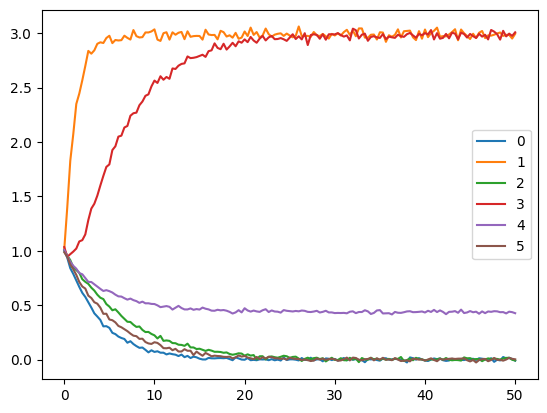

In [27]:
df = read_file('../data/aceto_pyrrole_basecase.csv')
df.plot()
plt.show()

In [28]:
# Creating Model Object
model = Incremental(N, Mw, V, Winhat, uin, uout, n0)
# Adding concentration data from csv file
model.add_concentration_data("../data/aceto_pyrrole_basecase.csv")

In [29]:
res = model.estimate_parameters(candidates_list, method = 'rate_based', conf_int = True, metric = 'aicc', plot = True, bootstraps = 1000)

Processing Reaction 1:
	Processing cand_ratelaw11 Law....
	Processing cand_ratelaw12 Law....
	Processing cand_ratelaw13 Law....
	Processing cand_ratelaw14 Law....
	Processing cand_ratelaw15 Law....
	Processing cand_ratelaw16 Law....
	Processing cand_ratelaw17 Law....
	Processing cand_ratelaw18 Law....
	Processing cand_ratelaw19 Law....
	Processing cand_ratelaw110 Law....
Processing Reaction 2:
	Processing cand_ratelaw21 Law....
	Processing cand_ratelaw22 Law....
	Processing cand_ratelaw23 Law....
	Processing cand_ratelaw24 Law....
	Processing cand_ratelaw25 Law....
	Processing cand_ratelaw26 Law....
Processing Reaction 3:
	Processing cand_ratelaw31 Law....
	Processing cand_ratelaw32 Law....
	Processing cand_ratelaw33 Law....
	Processing cand_ratelaw34 Law....
	Processing cand_ratelaw35 Law....


Reaction 1: 
Best Rate Law: cand_ratelaw15
Estimated Parameters: [0.02645086]
Confidence Interval [0.02557189 0.02746497]

Reaction 2: 
Best Rate Law: cand_ratelaw25
Estimated Parameters: [0.12782415]
Confidence Interval [0.1274547  0.12819642]

Reaction 3: 
Best Rate Law: cand_ratelaw32
Estimated Parameters: [0.02789895]
Confidence Interval [0.02770764 0.02807475]



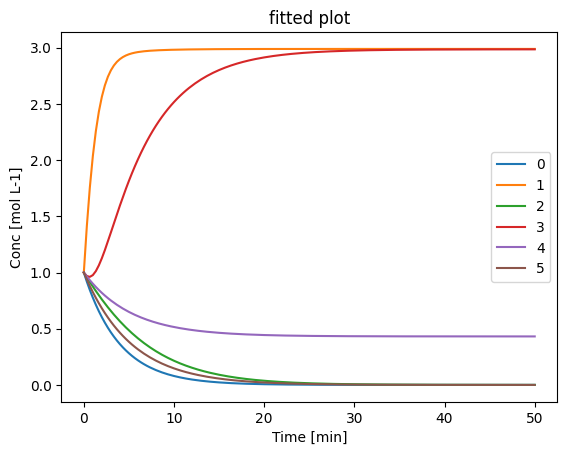

In [30]:
results = inc.simulate_best_rl()

In [31]:
res['results'][0][7].x, res['results'][1][4].x, res['results'][2][1].x

(array([0.05290171]), array([0.12782415]), array([0.02789895]))

In [32]:
res = model.estimate_parameters(candidates_list, method = 'extent_based', conf_int = True, metric = 'aicc', plot = True, bootstraps = 100)

Processing Reaction 1:
	Processing cand_ratelaw11 Law....
	Processing cand_ratelaw12 Law....
	Processing cand_ratelaw13 Law....
	Processing cand_ratelaw14 Law....
	Processing cand_ratelaw15 Law....
	Processing cand_ratelaw16 Law....
	Processing cand_ratelaw17 Law....
	Processing cand_ratelaw18 Law....
	Processing cand_ratelaw19 Law....
	Processing cand_ratelaw110 Law....
Processing Reaction 2:
	Processing cand_ratelaw21 Law....
	Processing cand_ratelaw22 Law....
	Processing cand_ratelaw23 Law....
	Processing cand_ratelaw24 Law....
	Processing cand_ratelaw25 Law....
	Processing cand_ratelaw26 Law....
Processing Reaction 3:
	Processing cand_ratelaw31 Law....
	Processing cand_ratelaw32 Law....
	Processing cand_ratelaw33 Law....
	Processing cand_ratelaw34 Law....
	Processing cand_ratelaw35 Law....


Reaction 1: 
Best Rate Law: cand_ratelaw16
Estimated Parameters: [0.12594933]
Confidence Interval [0.         0.12896045]

Reaction 2: 
Best Rate Law: cand_ratelaw23
Estimated Parameters: [0.04286418]
Confidence Interval [0.         0.04289888]

Reaction 3: 
Best Rate Law: cand_ratelaw34
Estimated Parameters: [0.01858805]
Confidence Interval [0.         0.01854367]



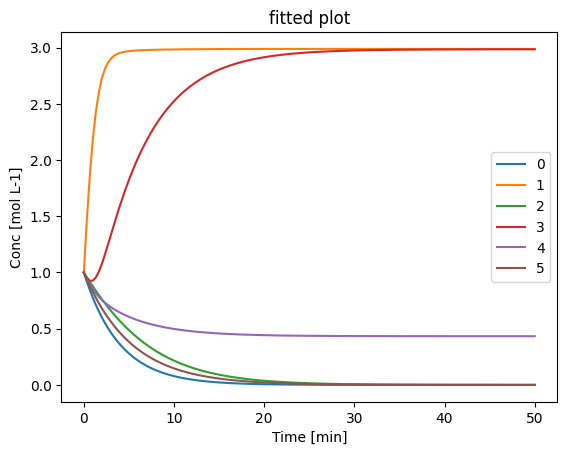

{'moles': array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
         1.00000000e+00, 1.00000000e+00],
        [9.18631809e-01, 1.46775851e+00, 9.57606465e-01, 9.51834268e-01,
         9.42800280e-01, 9.38119137e-01],
        [8.43884398e-01, 1.86581812e+00, 9.16250630e-01, 9.25928307e-01,
         8.92920908e-01, 8.80067514e-01],
        [7.75219050e-01, 2.18551975e+00, 8.75997303e-01, 9.27226727e-01,
         8.50107860e-01, 8.25608176e-01],
        [7.12140876e-01, 2.42828403e+00, 8.36896783e-01, 9.55867334e-01,
         8.13591086e-01, 7.74518830e-01],
        [6.54195260e-01, 2.60395931e+00, 7.98986611e-01, 1.00787895e+00,
         7.82343151e-01, 7.26590935e-01],
        [6.00964574e-01, 2.72642183e+00, 7.62293148e-01, 1.07725979e+00,
         7.55324378e-01, 6.81628861e-01],
        [5.52065173e-01, 2.80956264e+00, 7.26832984e-01, 1.15791003e+00,
         7.31633019e-01, 6.39449078e-01],
        [5.07144627e-01, 2.86507039e+00, 6.92614207e-01, 1.24471540e+00

In [33]:
model.simulate_best_rl()

In [34]:
res['results'][0][7].x, res['results'][1][4].x, res['results'][2][1].x

(array([0.]), array([0.]), array([0.]))

In [35]:
tuned_res = model.finetune(top_k = 3)

Best RateLaws: 
For reaction 1, best ratelaw is                         cand_ratelaw16
Parameters estimated: [0.13124621]
For reaction 2, best ratelaw is                         cand_ratelaw23
Parameters estimated: [0.04300421]
For reaction 3, best ratelaw is                         cand_ratelaw35
Parameters estimated: [0.16557052]


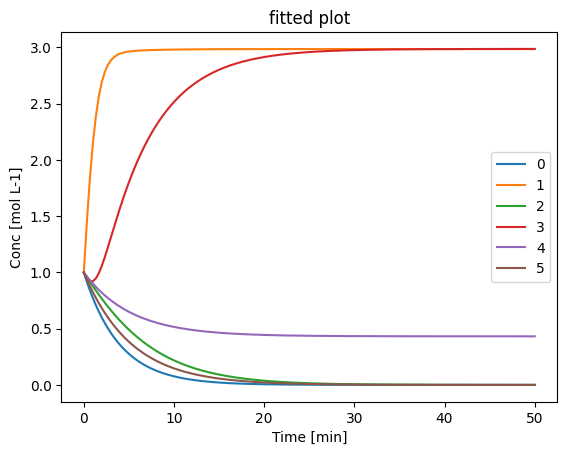

In [36]:
ans  = model.simulate_best_rl()

##### Conclusions

- Correct Ratelaws are: cand_ratelaw18, cand_ratelaw25, cand_ratelaw32
- Actual values are k1 = 0.053
- k2 = 0.128
- k3 = 0.028

- Values are close enough. Model is able to discriminate among decent number of ratelaws.

In [42]:
act_ratelaws = tuned_results['best_ratelaws']
K = tuned_results['params']
sim = Simulate(N, Mw, V, Winhat, uin, uout, n0)
sim.add_ratelaws(act_ratelaws, K)
results_normal = sim.run_simulation(time, alpha=0)

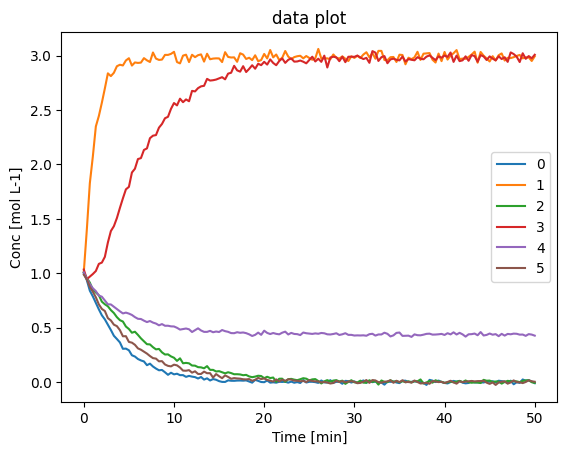

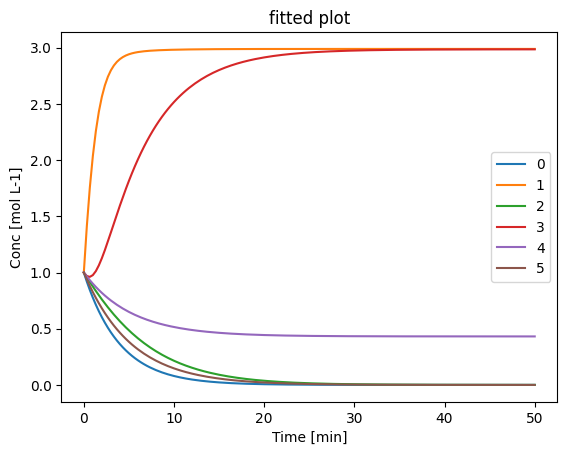

In [43]:
df.plot()
plt.xlabel("Time [min]")
plt.ylabel("Conc [mol L-1]")
plt.title("data plot")
plt.show()

plt.plot(time, results_normal['moles'][:,0], label = "0")
plt.plot(time, results_normal['moles'][:,1], label = "1")
plt.plot(time, results_normal['moles'][:,2], label = "2")
plt.plot(time, results_normal['moles'][:,3], label = "3")
plt.plot(time, results_normal['moles'][:,4], label = "4")
plt.plot(time, results_normal['moles'][:,5], label = "5")
plt.xlabel("Time [min]")
plt.ylabel("Conc [mol L-1]")
plt.title("fitted plot")
plt.legend()
plt.show()

In [44]:
# To show generation of ratelaw automatically.
cand = CandidateRateLaws(N[0], type = 'Irreversible')
cand

[RateLaw(type = "Irreversible", Expression = "K[0]")
RateLaw(type = "Irreversible", Expression = "K[0]*C[1]^1")
RateLaw(type = "Irreversible", Expression = "K[0]*C[0]^1*C[1]^1")
RateLaw(type = "Irreversible", Expression = "K[0]*C[0]^1")]

In [45]:
cand[0] + cand[1], cand[0] / cand[2]

(RateLaw(type = "<unk>", Expression = "K[0]+ K[0]*C[1]^1"),
 RateLaw(type = "<unk>", Expression = "K[0]/ K[0]*C[0]^1*C[1]^1"))

### High noise
- 151 data points
- 10% noise

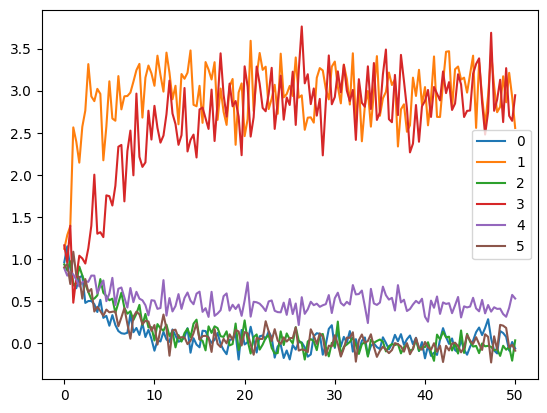

In [46]:
df = read_file('../data/aceto_pyrrole_highnoise.csv')
df.plot()
plt.show()

In [47]:
inc = Incremental(N, Mw, V, Winhat, uin, uout, n0)
inc.add_concentration_data("../data/aceto_pyrrole_highnoise.csv", preprocess = 'savgol_filter', window_length = 30, polyorder = 3)

In [48]:
res = inc.estimate_parameters(candidates_list, method = 'rate_based', conf_int = True, metric = 'aicc', plot = True, bootstraps = 1000)

Processing Reaction 1:
	Processing cand_ratelaw11 Law....
	Processing cand_ratelaw12 Law....
	Processing cand_ratelaw13 Law....
	Processing cand_ratelaw14 Law....
	Processing cand_ratelaw15 Law....
	Processing cand_ratelaw16 Law....
	Processing cand_ratelaw17 Law....
	Processing cand_ratelaw18 Law....
	Processing cand_ratelaw19 Law....
	Processing cand_ratelaw110 Law....
Processing Reaction 2:
	Processing cand_ratelaw21 Law....
	Processing cand_ratelaw22 Law....
	Processing cand_ratelaw23 Law....
	Processing cand_ratelaw24 Law....
	Processing cand_ratelaw25 Law....
	Processing cand_ratelaw26 Law....
Processing Reaction 3:
	Processing cand_ratelaw31 Law....
	Processing cand_ratelaw32 Law....
	Processing cand_ratelaw33 Law....
	Processing cand_ratelaw34 Law....
	Processing cand_ratelaw35 Law....


Reaction 1: 
Best Rate Law: cand_ratelaw19
Estimated Parameters: [0.10398157]
Confidence Interval [0.09726473 0.11614267]

Reaction 2: 
Best Rate Law: cand_ratelaw24
Estimated Parameters: [0.37368402]
Confidence Interval [0.36994609 0.37729686]

Reaction 3: 
Best Rate Law: cand_ratelaw31
Estimated Parameters: [0.09094677]
Confidence Interval [0.0862253  0.09557099]



In [49]:
res['results'][0][7].x, res['results'][1][4].x, res['results'][2][1].x

(array([0.06178778]), array([0.12524324]), array([0.03038014]))

In [50]:
res = inc.estimate_parameters(candidates_list, method = 'extent_based', conf_int = False, metric = 'aicc', plot = True, bootstraps = 1000)

Processing Reaction 1:
	Processing cand_ratelaw11 Law....
	Processing cand_ratelaw12 Law....
	Processing cand_ratelaw13 Law....
	Processing cand_ratelaw14 Law....
	Processing cand_ratelaw15 Law....
	Processing cand_ratelaw16 Law....
	Processing cand_ratelaw17 Law....
	Processing cand_ratelaw18 Law....
	Processing cand_ratelaw19 Law....
	Processing cand_ratelaw110 Law....
Processing Reaction 2:
	Processing cand_ratelaw21 Law....
	Processing cand_ratelaw22 Law....
	Processing cand_ratelaw23 Law....
	Processing cand_ratelaw24 Law....
	Processing cand_ratelaw25 Law....
	Processing cand_ratelaw26 Law....
Processing Reaction 3:
	Processing cand_ratelaw31 Law....
	Processing cand_ratelaw32 Law....
	Processing cand_ratelaw33 Law....
	Processing cand_ratelaw34 Law....
	Processing cand_ratelaw35 Law....


Reaction 1: 
Best Rate Law: cand_ratelaw19
Estimated Parameters: [0.08607838]

Reaction 2: 
Best Rate Law: cand_ratelaw25
Estimated Parameters: [0.12610499]

Reaction 3: 
Best Rate Law: cand_ratelaw35
Estimated Parameters: [0.1765807]



In [51]:
tuned_results = inc.finetune(top_k = 3)

Best RateLaws: 
For reaction 1, best ratelaw is                         cand_ratelaw16
Parameters estimated: [0.12166641]
For reaction 2, best ratelaw is                         cand_ratelaw25
Parameters estimated: [0.12518151]
For reaction 3, best ratelaw is                         cand_ratelaw35
Parameters estimated: [0.17448779]


In [52]:
act_ratelaws = tuned_results['best_ratelaws']
K = tuned_results['params']
sim = Simulate(N, Mw, V, Winhat, uin, uout, n0)
sim = Simulate(N,Mw,V,Winhat,uin, uout, n0)
sim.add_ratelaws(act_ratelaws, K)
results_normal = sim.run_simulation(time, alpha=0)

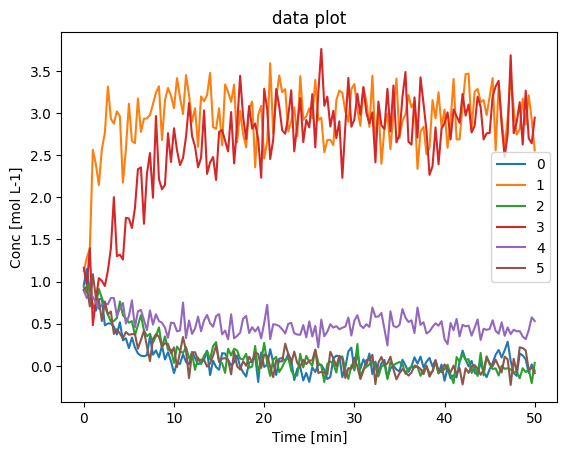

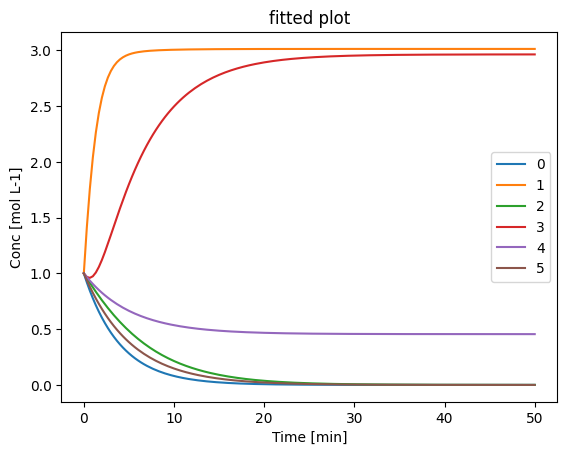

In [53]:
df.plot()
plt.xlabel("Time [min]")
plt.ylabel("Conc [mol L-1]")
plt.title("data plot")
plt.show()

plt.plot(time, results_normal['moles'][:,0], label = "0")
plt.plot(time, results_normal['moles'][:,1], label = "1")
plt.plot(time, results_normal['moles'][:,2], label = "2")
plt.plot(time, results_normal['moles'][:,3], label = "3")
plt.plot(time, results_normal['moles'][:,4], label = "4")
plt.plot(time, results_normal['moles'][:,5], label = "5")
plt.xlabel("Time [min]")
plt.ylabel("Conc [mol L-1]")
plt.title("fitted plot")
plt.legend()
plt.show()

### Fewer Data Points
- 21 points

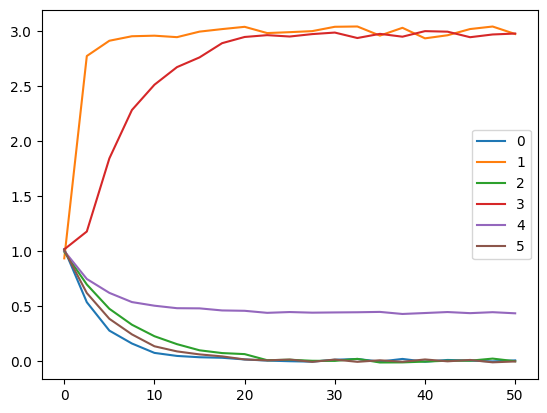

In [55]:
df = read_file('../data/aceto_pyrrole_fewerdata.csv')
df.plot()
plt.show()

In [56]:
inc = Incremental(N, Mw, V, Winhat, uin, uout, n0)
inc.add_concentration_data("../data/aceto_pyrrole_fewerdata.csv")

In [57]:
res = inc.estimate_parameters(candidates_list, method = 'rate_based', conf_int = True, metric = 'aicc', plot = True, bootstraps = 1000)

Processing Reaction 1:
	Processing cand_ratelaw11 Law....
	Processing cand_ratelaw12 Law....
	Processing cand_ratelaw13 Law....
	Processing cand_ratelaw14 Law....
	Processing cand_ratelaw15 Law....
	Processing cand_ratelaw16 Law....
	Processing cand_ratelaw17 Law....
	Processing cand_ratelaw18 Law....
	Processing cand_ratelaw19 Law....
	Processing cand_ratelaw110 Law....
Processing Reaction 2:
	Processing cand_ratelaw21 Law....
	Processing cand_ratelaw22 Law....
	Processing cand_ratelaw23 Law....
	Processing cand_ratelaw24 Law....
	Processing cand_ratelaw25 Law....
	Processing cand_ratelaw26 Law....
Processing Reaction 3:
	Processing cand_ratelaw31 Law....
	Processing cand_ratelaw32 Law....
	Processing cand_ratelaw33 Law....
	Processing cand_ratelaw34 Law....
	Processing cand_ratelaw35 Law....


Reaction 1: 
Best Rate Law: cand_ratelaw16
Estimated Parameters: [0.13609046]
Confidence Interval [0.11818036 0.2227273 ]

Reaction 2: 
Best Rate Law: cand_ratelaw21
Estimated Parameters: [0.58218439]
Confidence Interval [0.56911823 0.59302406]

Reaction 3: 
Best Rate Law: cand_ratelaw31
Estimated Parameters: [0.09337624]
Confidence Interval [0.08835176 0.10148203]



In [58]:
res['results'][0][7].x, res['results'][1][4].x, res['results'][2][1].x

(array([0.04047266]), array([0.13326271]), array([0.03252742]))

In [59]:
res = inc.estimate_parameters(candidates_list, method = 'extent_based', conf_int = False, metric = 'aicc', plot = True)

Processing Reaction 1:
	Processing cand_ratelaw11 Law....
	Processing cand_ratelaw12 Law....
	Processing cand_ratelaw13 Law....
	Processing cand_ratelaw14 Law....
	Processing cand_ratelaw15 Law....
	Processing cand_ratelaw16 Law....
	Processing cand_ratelaw17 Law....
	Processing cand_ratelaw18 Law....
	Processing cand_ratelaw19 Law....
	Processing cand_ratelaw110 Law....
Processing Reaction 2:
	Processing cand_ratelaw21 Law....
	Processing cand_ratelaw22 Law....
	Processing cand_ratelaw23 Law....
	Processing cand_ratelaw24 Law....
	Processing cand_ratelaw25 Law....
	Processing cand_ratelaw26 Law....
Processing Reaction 3:
	Processing cand_ratelaw31 Law....
	Processing cand_ratelaw32 Law....
	Processing cand_ratelaw33 Law....
	Processing cand_ratelaw34 Law....
	Processing cand_ratelaw35 Law....


Reaction 1: 
Best Rate Law: cand_ratelaw13
Estimated Parameters: [0.03883437]

Reaction 2: 
Best Rate Law: cand_ratelaw26
Estimated Parameters: [1.12409317]

Reaction 3: 
Best Rate Law: cand_ratelaw31
Estimated Parameters: [0.07897569]



In [60]:
tuned_results = inc.finetune(top_k = 2)

Best RateLaws: 
For reaction 1, best ratelaw is                         cand_ratelaw11
Parameters estimated: [8.05193855e-07]
For reaction 2, best ratelaw is                         cand_ratelaw26
Parameters estimated: [1.14921158]
For reaction 3, best ratelaw is                         cand_ratelaw35
Parameters estimated: [0.18012873]


In [61]:
tuned_results

{'best_ratelaws': [<function __main__.cand_ratelaw11(y, K)>,
  <function __main__.cand_ratelaw26(y, K)>,
  <function __main__.cand_ratelaw35(y, K)>],
 'params': [array([8.05193855e-07]), array([1.14921158]), array([0.18012873])],
 'tuned_results': [       message: Optimization terminated successfully.
         success: True
          status: 0
             fun: 3.5340248858257186
               x: [ 0.000e+00  1.149e+00  9.003e-02]
             nit: 110
            nfev: 191
   final_simplex: (array([[ 0.000e+00,  1.149e+00,  9.003e-02],
                         [ 0.000e+00,  1.149e+00,  9.002e-02],
                         [ 0.000e+00,  1.149e+00,  9.010e-02],
                         [ 0.000e+00,  1.149e+00,  9.011e-02]]), array([ 3.534e+00,  3.534e+00,  3.534e+00,  3.534e+00])),
         message: Optimization terminated successfully.
         success: True
          status: 0
             fun: 3.5340345181389363
               x: [ 4.207e-06  1.149e+00  1.804e-01]
             nit: 

In [62]:
act_ratelaws = tuned_results['best_ratelaws']
K = tuned_results['params']
sim = Simulate(N, Mw, V, Winhat, uin, uout, n0)
sim = Simulate(N,Mw,V,Winhat,uin, uout, n0)
sim.add_ratelaws(act_ratelaws, K)
results_normal = sim.run_simulation(time, alpha=0)

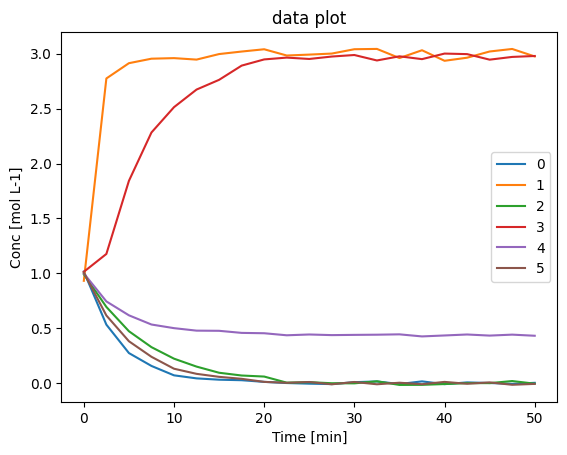

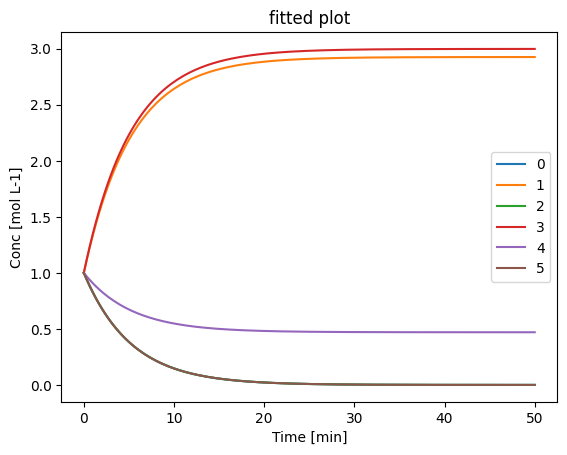

In [63]:
df.plot()
plt.xlabel("Time [min]")
plt.ylabel("Conc [mol L-1]")
plt.title("data plot")
plt.show()

plt.plot(time, results_normal['moles'][:,0], label = "0")
plt.plot(time, results_normal['moles'][:,1], label = "1")
plt.plot(time, results_normal['moles'][:,2], label = "2")
plt.plot(time, results_normal['moles'][:,3], label = "3")
plt.plot(time, results_normal['moles'][:,4], label = "4")
plt.plot(time, results_normal['moles'][:,5], label = "5")
plt.xlabel("Time [min]")
plt.ylabel("Conc [mol L-1]")
plt.title("fitted plot")
plt.legend()
plt.show()

### Missing data:
- Conc A is unavailable

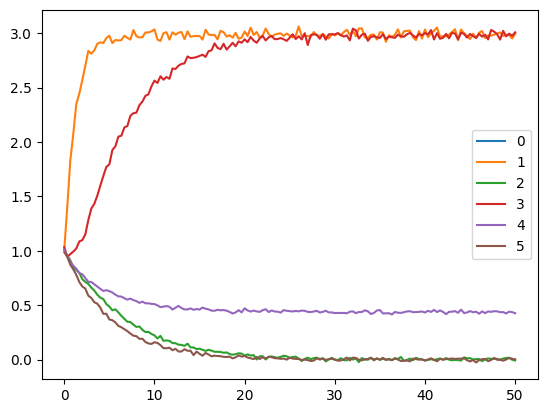

In [64]:
df = read_file('../data/aceto_pyrrole_a_missing.csv')
df.plot()
plt.show()

In [65]:
inc = Incremental(N, Mw, V, Winhat, uin, uout, n0)
inc.add_concentration_data("../data/aceto_pyrrole_a_missing.csv")

In [66]:
res = inc.estimate_parameters(candidates_list, method = 'extent_based', conf_int = False, metric = 'aicc', plot = True, bootstraps = 100)

Processing Reaction 1:
	Processing cand_ratelaw11 Law....
	Processing cand_ratelaw12 Law....
	Processing cand_ratelaw13 Law....
	Processing cand_ratelaw14 Law....
	Processing cand_ratelaw15 Law....
	Processing cand_ratelaw16 Law....
	Processing cand_ratelaw17 Law....
	Processing cand_ratelaw18 Law....
	Processing cand_ratelaw19 Law....
	Processing cand_ratelaw110 Law....
Processing Reaction 2:
	Processing cand_ratelaw21 Law....
	Processing cand_ratelaw22 Law....
	Processing cand_ratelaw23 Law....
	Processing cand_ratelaw24 Law....
	Processing cand_ratelaw25 Law....
	Processing cand_ratelaw26 Law....
Processing Reaction 3:
	Processing cand_ratelaw31 Law....
	Processing cand_ratelaw32 Law....
	Processing cand_ratelaw33 Law....
	Processing cand_ratelaw34 Law....
	Processing cand_ratelaw35 Law....


Reaction 1: 
Best Rate Law: cand_ratelaw16
Estimated Parameters: [0.13501265]

Reaction 2: 
Best Rate Law: cand_ratelaw25
Estimated Parameters: [0.12773337]

Reaction 3: 
Best Rate Law: cand_ratelaw35
Estimated Parameters: [0.16513576]



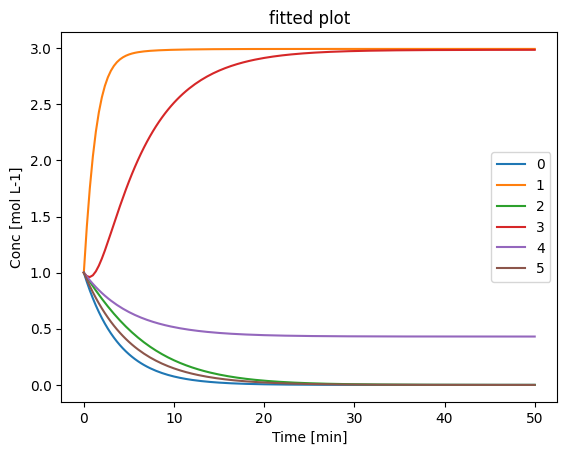

In [67]:
res = inc.simulate_best_rl()

In [68]:
tuned_results = inc.finetune()

Best RateLaws: 
For reaction 1, best ratelaw is                         cand_ratelaw16
Parameters estimated: [0.12876044]
For reaction 2, best ratelaw is                         cand_ratelaw25
Parameters estimated: [0.12777699]
For reaction 3, best ratelaw is                         cand_ratelaw35
Parameters estimated: [0.16514164]


In [69]:
act_ratelaws = tuned_results['best_ratelaws']
K = tuned_results['params']
sim = Simulate(N, Mw, V, Winhat, uin, uout, n0)
sim = Simulate(N,Mw,V,Winhat,uin, uout, n0)
sim.add_ratelaws(act_ratelaws, K)
results_normal = sim.run_simulation(time, alpha=0)

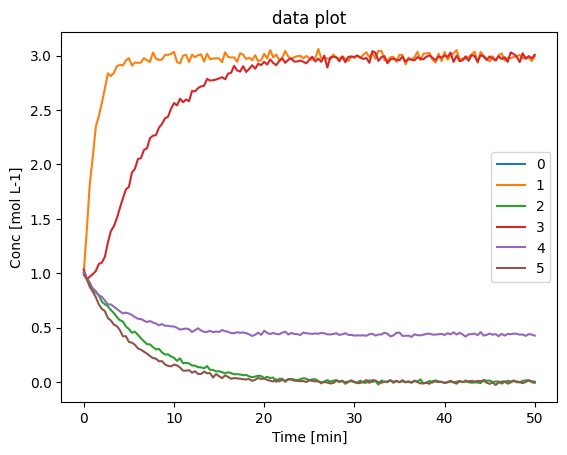

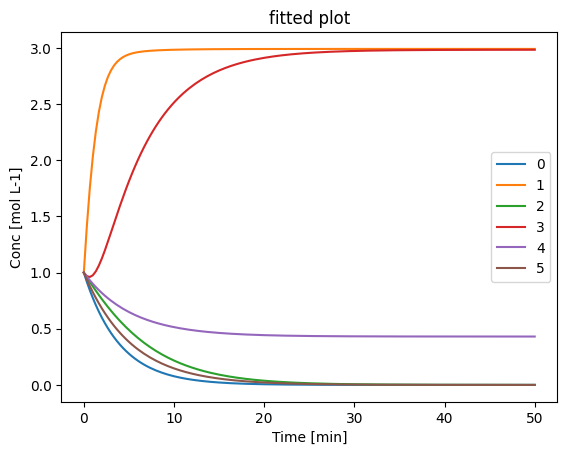

In [70]:
df.plot()
plt.xlabel("Time [min]")
plt.ylabel("Conc [mol L-1]")
plt.title("data plot")
plt.show()

plt.plot(time, results_normal['moles'][:,0], label = "0")
plt.plot(time, results_normal['moles'][:,1], label = "1")
plt.plot(time, results_normal['moles'][:,2], label = "2")
plt.plot(time, results_normal['moles'][:,3], label = "3")
plt.plot(time, results_normal['moles'][:,4], label = "4")
plt.plot(time, results_normal['moles'][:,5], label = "5")
plt.xlabel("Time [min]")
plt.ylabel("Conc [mol L-1]")
plt.title("fitted plot")
plt.legend()
plt.show()

# Pythalyl Chloride

In [71]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt 
import pandas as pd 
from Incremental import Incremental
from ratelawgen import CandidateRateLaws, RateLaw
from simulate import Simulate
from preprocess import read_file

In [72]:
N = [[-1, -1, 1, 1, 0, 0, 0], [0, -1, -1, 1, 1, 0, 0], [0, -1, 0, -1, 0, 1, 1]]
Mw = [203, 46, 212.5, 36.5, 222, 64.5, 18]
V = 0.1050032559
Winhat = np.array([[1,0],[0,1],[0,0],[0,0],[0,0],[0,0],[0,0]])
uin = '../data/pythalylchloride_uin.csv'
uout = '../data/pythalylchloride_uout.csv'
n0 = [0, 0, 0, 0, 0, 1, 0]

In [73]:
# define rate laws as functions
def act_ratelaw1(y,K):
    Ca, Cb, _, _, _, _ , _= y 
    return K[0]*Ca*Cb

def act_ratelaw2(y,K):
    _, Cb, Cc, _, _, _, _ = y
    return K[0]*Cb*Cc

def act_ratelaw3(y,K):
    _, Cb, _, Cd, _, Cf, Cg = y 
    return K[0]*Cb*Cd - K[1]*Cf*Cg

act_ratelaws = [act_ratelaw1, act_ratelaw2, act_ratelaw3]
K = [[0.127],[0.023],[11.97, 8.01]]

In [74]:
sim = Simulate(N, Mw, V, Winhat, uin, uout, n0)
sim.add_ratelaws(act_ratelaws, K)

In [75]:
time = np.linspace(0, 50, 501)

In [76]:
results = sim.run_simulation(time, alpha = 0)
c_noise = results['moles']/V

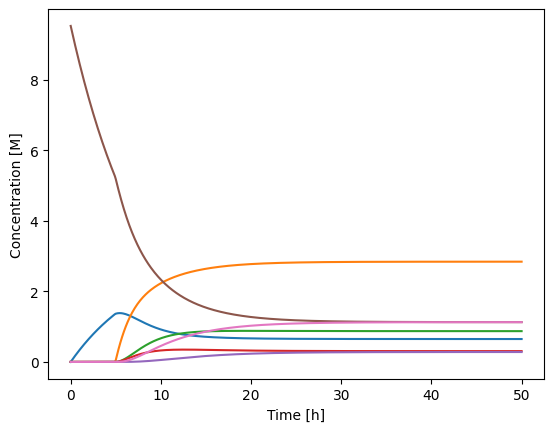

In [77]:
plt.plot(time, c_noise)
plt.xlabel("Time [h]")
plt.ylabel("Concentration [M]")
plt.show()

In [78]:
# creating model object
inc = Incremental(N, Mw, V, Winhat, uin, uout, n0)
# adding concentration data
inc.add_concentration_data(c_noise, time)

In [79]:
cand_ratelaws1 = CandidateRateLaws(N[0], type = "Irreversible")
cand_ratelaws2 = CandidateRateLaws(N[1], type = "Irreversible")
cand_ratelaws3 = CandidateRateLaws(N[2], type = "Reversible")

cand_list = [cand_ratelaws1, cand_ratelaws2, cand_ratelaws3]

In [80]:
cand_list = [cand_ratelaws1, cand_ratelaws2, cand_ratelaws3]

In [81]:
res = inc.estimate_parameters(cand_list, method = 'rate_based', metric = 'aicc', solver = None)

Processing Reaction 1:
	Processing expression K[0]
	Processing expression K[0]*C[1]^1
	Processing expression K[0]*C[0]^1*C[1]^1
	Processing expression K[0]*C[0]^1
Processing Reaction 2:
	Processing expression K[0]
	Processing expression K[0]*C[2]^1
	Processing expression K[0]*C[1]^1*C[2]^1
	Processing expression K[0]*C[1]^1
Processing Reaction 3:
	Processing expression K[0]*C[3]^1- K[1]*C[6]^1
	Processing expression K[0]*C[3]^1- K[1]*C[5]^1*C[6]^1
	Processing expression K[0]*C[3]^1- K[1]*C[5]^1
	Processing expression K[0]*C[1]^1*C[3]^1- K[1]*C[6]^1
	Processing expression K[0]*C[1]^1*C[3]^1- K[1]*C[5]^1*C[6]^1
	Processing expression K[0]*C[1]^1*C[3]^1- K[1]*C[5]^1
	Processing expression K[0]*C[1]^1- K[1]*C[6]^1
	Processing expression K[0]*C[1]^1- K[1]*C[5]^1*C[6]^1
	Processing expression K[0]*C[1]^1- K[1]*C[5]^1


Reaction 1: 
Best Rate Law: K[0]*C[0]^1*C[1]^1
Estimated Parameters: [0.12700071]

Reaction 2: 
Best Rate Law: K[0]*C[1]^1*C[2]^1
Estimated Parameters: [0.02299999]

Reaction 3: 
Best Rate Law: K[0]*C[1]^1*C[3]^1- K[1]*C[5]^1*C[6]^1
Estimated Parameters: [11.9655142   8.00693116]



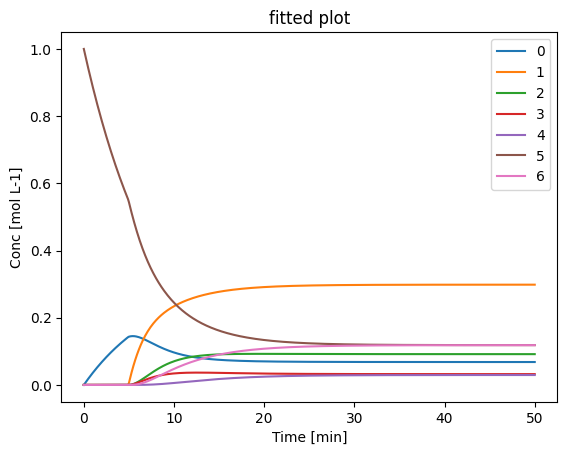

In [82]:
ans = inc.simulate_best_rl()

In [83]:
res = inc.estimate_parameters(cand_list, method = 'extent_based', metric = 'aicc', solver = None)

Processing Reaction 1:
	Processing expression K[0]
	Processing expression K[0]*C[1]^1
	Processing expression K[0]*C[0]^1*C[1]^1
	Processing expression K[0]*C[0]^1
Processing Reaction 2:
	Processing expression K[0]
	Processing expression K[0]*C[2]^1
	Processing expression K[0]*C[1]^1*C[2]^1
	Processing expression K[0]*C[1]^1
Processing Reaction 3:
	Processing expression K[0]*C[3]^1- K[1]*C[6]^1
	Processing expression K[0]*C[3]^1- K[1]*C[5]^1*C[6]^1
	Processing expression K[0]*C[3]^1- K[1]*C[5]^1
	Processing expression K[0]*C[1]^1*C[3]^1- K[1]*C[6]^1
	Processing expression K[0]*C[1]^1*C[3]^1- K[1]*C[5]^1*C[6]^1
	Processing expression K[0]*C[1]^1*C[3]^1- K[1]*C[5]^1
	Processing expression K[0]*C[1]^1- K[1]*C[6]^1
	Processing expression K[0]*C[1]^1- K[1]*C[5]^1*C[6]^1
	Processing expression K[0]*C[1]^1- K[1]*C[5]^1


Reaction 1: 
Best Rate Law: K[0]*C[0]^1*C[1]^1
Estimated Parameters: [0.12699976]

Reaction 2: 
Best Rate Law: K[0]*C[1]^1*C[2]^1
Estimated Parameters: [0.023]

Reaction 3: 
Best Rate Law: K[0]*C[1]^1- K[1]*C[6]^1
Estimated Parameters: [0.09603412 0.03784171]



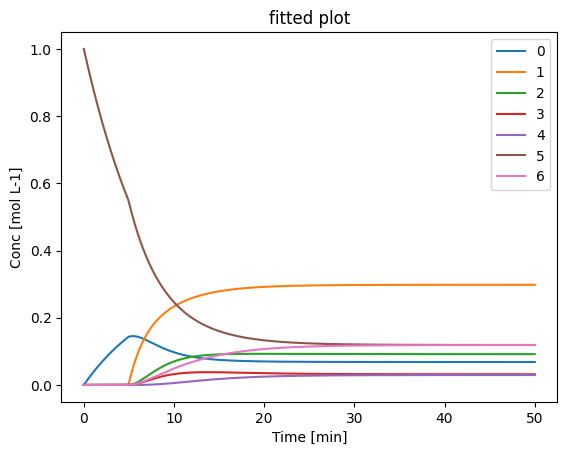

In [84]:
ans = inc.simulate_best_rl()

In [85]:
inc.finetune(top_k = 2, metric = 'rmse')

Best RateLaws: 
For reaction 1, best ratelaw is                         K[0]*C[0]^1*C[1]^1
Parameters estimated: [0.]
For reaction 2, best ratelaw is                         K[0]*C[1]^1*C[2]^1
Parameters estimated: [0.0297309]
For reaction 3, best ratelaw is                         K[0]*C[1]^1- K[1]*C[6]^1
Parameters estimated: [0.         0.01489798]


{'best_ratelaws': [<function ratelawgen.powerlaw_generator.<locals>.<lambda>(y, K, saved_i=0)>,
  <function ratelawgen.powerlaw_generator.<locals>.<lambda>(y, K, saved_i=1)>,
  <function ratelawgen.CandidateRateLaws.__init__.<locals>.<lambda>(y, K, saved_key1='[0, 1, 0, 0, 0, 0, 0]', saved_key2='[0, 0, 0, 0, 0, 0, 1]')>],
 'params': [array([0.]), array([0.0297309]), array([0.        , 0.01489798])],
 'tuned_results': [       message: Optimization terminated successfully.
         success: True
          status: 0
             fun: 79.82170935277757
               x: [ 0.000e+00  2.973e-02  0.000e+00  1.490e-02]
             nit: 34
            nfev: 92
   final_simplex: (array([[ 0.000e+00,  2.973e-02,  0.000e+00,  1.490e-02],
                         [ 0.000e+00,  2.972e-02,  0.000e+00,  1.486e-02],
                         ...,
                         [ 0.000e+00,  2.973e-02,  0.000e+00,  1.484e-02],
                         [ 0.000e+00,  2.973e-02,  0.000e+00,  1.484e-02]]), array(

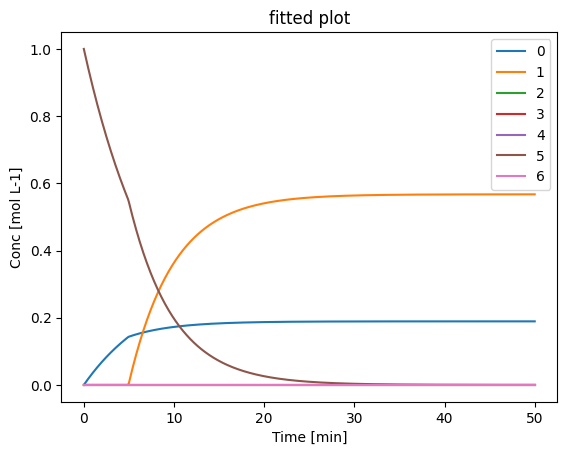

In [86]:
res = inc.simulate_best_rl()